# Anova Testing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from math import sqrt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.libqsturng import psturng, qsturng
from scipy.spatial.distance import pdist, squareform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### 1.	In the theory of finance, a market for any asset or commodity is said to be efficient in terms of identical quality and other attributes ( such as risks, incase of the stocks ) are sold at the same price. A Geneva based oil industry analyst wants to test the hypothesis that the spot market for crude oil is efficient. The analyst chooses the Rotterdam oil market and he selects Arabian light as the type of oil to be studied. (Differences in location may cause price differences because of transportation costs, and differences in type of oil – hence, in quality of oil – also affect price. Therefore, both the type and location must be fixed). A random sample of eight sample observations for each of the 4 sources of the spot price of barrel during Feb is collected . Refer the Oil_Prices.csv
>a.	What should analyst conclude <br>
>b.	Use the Tukey method to determine which oil types if any have average price difference 


In [4]:
Oil_prices = pd.read_csv("Oil_Prices.csv")

In [5]:
Oil_prices_mean = Oil_prices.groupby('Country').agg({'Oil_Price': [np.mean, len]}).reset_index()
Oil_prices_mean.columns = ['Country', 'Mean_Oil_Price', 'Count']

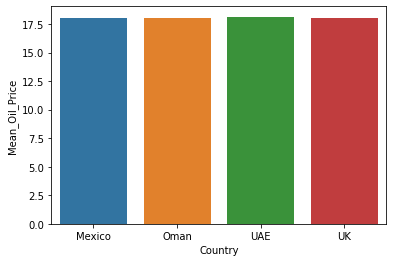

In [6]:
sns.barplot(data=Oil_prices_mean, x = 'Country', y='Mean_Oil_Price')

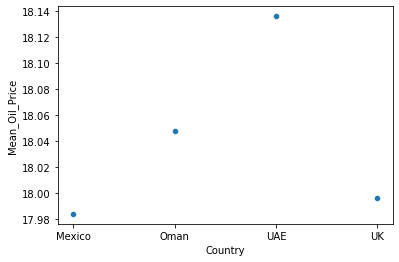

In [8]:
sns.scatterplot(data=Oil_prices_mean, x = 'Country', y='Mean_Oil_Price')

In [9]:
Oil_prices_mean

,Country,Mean_Oil_Price,Count
0,Mexico,17.98375,8.0
1,Oman,18.04750,8.0
2,UAE,18.13625,8.0
3,UK,17.99625,8.0


In [10]:
Oil_prices = Oil_prices.merge(Oil_prices_mean)
Oil_prices['grand_mean'] = Oil_prices['Oil_Price'].mean()

In [11]:
Oil_prices['STR'] = (Oil_prices['Mean_Oil_Price'] - Oil_prices['grand_mean'])**2
Oil_prices['SE'] = (Oil_prices['Oil_Price'] - Oil_prices['Mean_Oil_Price'])**2

In [12]:
Oil_prices.head(3)

,Country,Oil_Price,Mean_Oil_Price,Count,grand_mean,STR,SE
0,UK,17.80,17.99625,8.0,18.040938,0.001997,0.038514
1,UK,18.00,17.99625,8.0,18.040938,0.001997,0.000014
2,UK,17.98,17.99625,8.0,18.040938,0.001997,0.000264


In [13]:
SSTR = sum(Oil_prices['STR'])
SSE = sum(Oil_prices['SE'])

In [19]:
df1 = len(Oil_prices) - Oil_prices.Country.nunique()  ## n-r
df2 = Oil_prices.Country.nunique() -1                ## r-1

MSTR = SSTR/df2
MSE = SSE/df1
Fstatistic = MSTR/MSE

print(df1)
print(df2)

28
3


In [15]:
stats.f.ppf(.995, df2, df1)

5.317038349349619

In [16]:
stats.f.sf(Fstatistic,df2, df1)

0.24421883677282386

In [17]:
# generate model for linear regression
my_model = smf.ols(formula='Oil_Price ~ Country', data=Oil_prices)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# # print summary of linear regression
# print(my_model_fit.summary())

# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

            sum_sq    df         F    PR(>F)
Country   0.115159   3.0  1.469313  0.244219
Residual  0.731512  28.0       NaN       NaN


In [18]:
## T value for 95% Confidence intervals for the each of the population means
tvalue = stats.t.ppf(0.995, df1)
tvalue

2.763262455461066

In [23]:
Oil_prices_mean["LowerCI"] = Oil_prices_mean.Mean_Oil_Price - tvalue * (MSE/Oil_prices_mean.Count).apply(sqrt)
Oil_prices_mean["UpperCI"] = Oil_prices_mean.Mean_Oil_Price + tvalue * (MSE/Oil_prices_mean.Count).apply(sqrt)

Oil_prices_mean.head()
## Comparison between different population 
qsturng(0.995, r=4, v=28) * sqrt(MSE/8)

,Country,Mean_Oil_Price,Count,LowerCI,UpperCI
0,Mexico,17.98375,8.0,17.82584,18.14166
1,Oman,18.04750,8.0,17.88959,18.20541
2,UAE,18.13625,8.0,17.97834,18.29416
3,UK,17.99625,8.0,17.83834,18.15416


0.29826100769627323

In [24]:
18.04 - 17.98

0.05999999999999872

#### 2.	A study is undertaken to determine whether differences exist in average consumer quality ratings of the following brands of color television sets, Magnavox, General Electric, Panasonic, Zenith, Sears,  Philco, Sylvania and RCA. For each brand 100 randomly choosen consumer reports are available and from these the following quantities are computed:      SSTR = 45,210, SST = 92340. 
> a.	Construct an ANOVA table for this study and test the null hypothesis that 8 brands have equal average consumer quality rating Vs alternative hypothesis that they do not <br>
>b.	Suppose the sample means in order listed are 77, 78, 82, 94, 88, 89,90,87. Use the Tukey procedure to determine whether differences in average population ratings use 99% confidene



In [17]:
SSTR = 45210
SST = 92340
SSE = SST - SSTR
r = 8 
n = r*100

MSE = SSE/(n-r)
MSTR = SSTR/(r-1)

In [18]:
Fstatistic_2 =  MSTR/MSE
Fstatistic_2
stats.f.ppf(0.99, r-1, n-r) ## r-1 and n-1 degrees of freedom
stats.f.sf(Fstatistic_2, r-1, n-r)

108.5336000727471

2.6618784106043045

3.438030420932265e-111

In [19]:
Tukey_value_2 = qsturng(0.995, r = 8, v = 792) * sqrt(MSE/100) ## r and n-r degrees of freedom
Tukey_value_2

4.071165841515532

In [20]:
brands = ["Magnavox", "General Electric", "Panasonic", "Zenith", "Sears",  "Philco", "Sylvania", "RCA"]
mean = [77, 78, 82, 94, 88, 89, 90, 87]
brand_means = pd.DataFrame({"brands":brands, "mean":mean})
brand_means = brand_means.set_index('brands')

In [21]:
a = squareform(pdist(brand_means, 'euclidean'))
a = pd.DataFrame(abs(a - Tukey_value_2), columns=brands, index=brands)
a

,Magnavox,General Electric,Panasonic,Zenith,Sears,Philco,Sylvania,RCA
Magnavox,4.071166,3.071166,0.928834,12.928834,6.928834,7.928834,8.928834,5.928834
General Electric,3.071166,4.071166,0.071166,11.928834,5.928834,6.928834,7.928834,4.928834
Panasonic,0.928834,0.071166,4.071166,7.928834,1.928834,2.928834,3.928834,0.928834
Zenith,12.928834,11.928834,7.928834,4.071166,1.928834,0.928834,0.071166,2.928834
Sears,6.928834,5.928834,1.928834,1.928834,4.071166,3.071166,2.071166,3.071166
Philco,7.928834,6.928834,2.928834,0.928834,3.071166,4.071166,3.071166,2.071166
Sylvania,8.928834,7.928834,3.928834,0.071166,2.071166,3.071166,4.071166,1.071166
RCA,5.928834,4.928834,0.928834,2.928834,3.071166,2.071166,1.071166,4.071166


In [22]:
brands = ["Magnavox", "General Electric", "Panasonic", "Zenith", "Sears",  "Philco", "Sylvania", "RCA"]
mean = [77, 78, 82, 94, 88, 89,90,87]
sample_size = [100, 100, 100, 100, 100, 100, 100, 100]
brand_means = pd.DataFrame({"brands": brands, "mean": mean, "sample_size": sample_size})

In [23]:
##CI
df2 = sum(brand_means["sample_size"]) - len(brand_means) ##n-r degree of freedom

brand_means["L_CI"] = brand_means["mean"] + stats.t.ppf(0.005, df2) * MSE/(brand_means["sample_size"]).apply(sqrt)
brand_means["U_CI"] = brand_means["mean"] + stats.t.ppf(0.995, df2) * MSE/(brand_means["sample_size"]).apply(sqrt)

In [24]:
brand_means

,brands,mean,sample_size,L_CI,U_CI
0,Magnavox,77,100,61.634839,92.365161
1,General Electric,78,100,62.634839,93.365161
2,Panasonic,82,100,66.634839,97.365161
3,Zenith,94,100,78.634839,109.365161
4,Sears,88,100,72.634839,103.365161
5,Philco,89,100,73.634839,104.365161
6,Sylvania,90,100,74.634839,105.365161
7,RCA,87,100,71.634839,102.365161


#### 3.	Analysis of Variance has long been used in providing evidence of the effectiveness of pharma drugs. Such evidence is required before the FDA will allow the drug to be marketed. In a recent test of the effectiveness of a new sleeping pill, three groups of 25 patients each for given the following treatment. The first group was given the drug, the second group was given a placebo, No-treatment group. The number of minutes it took each person to fall asleep.
>Drug Group : 12,17,34,11,5,42,18,27,2,37,50,32,12,27,21,10,4,33,63,22,41,19,28,29,8
<br>Placebo Group: 44,32,28,30,22,12,3,12,42,13,27,54,56,32,37,28,22,22,24,9,20,4,13,42,67
<br>No-treatement Group: 32, 33, 21, 12, 15, 14, 55,67, 72,1,44,60,36,38,49,66,89,63,23,6,9,56,28,39,59
<br>Determine whether drug is effective. What about placebo 


In [25]:
Drug = [12,17,34,11,5,42,18,27,2,37,50,32,12,27,21,10,4,33,63,22,41,19,28,29,8]
Placebo = [44,32,28,30,22,12,3,12,42,13,27,54,56,32,37,28,22,22,24,9,20,4,13,42,67]
Notreatment = [32, 33, 21, 12, 15, 14, 55,67, 72,1,44,60,36,38,49,66,89,63,23,6,9,56,28,39,59]

Data3 = pd.DataFrame({"Drug":Drug, "Placebo":Placebo, "Notreatment": Notreatment})

Data3 = Data3.melt(var_name="Group", value_name="Mins")

In [26]:
Data3.sample(5)

,Group,Mins
41,Placebo,22
44,Placebo,9
8,Drug,2
32,Placebo,12
64,Notreatment,49


In [27]:
# generate model for linear regression
my_model3 = smf.ols(formula='Mins ~ Group', data=Data3)

# fit model to data to obtain parameter estimates
my_model_fit3 = my_model3.fit()

# # print summary of linear regression
# print(my_model_fit3.summary())

# show anova table
anova_table3 = sm.stats.anova_lm(my_model_fit3, typ=2)
print(anova_table)

            sum_sq    df         F    PR(>F)
Country   0.115159   3.0  1.469313  0.244219
Residual  0.731512  28.0       NaN       NaN


In [28]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=Data3, res_var='Mins', xfac_var='Group')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Group),2.0,3203.12,1601.560000,4.547087,0.013815
Residual,72.0,25359.60,352.216667,NaN,NaN


In [29]:
MSE3 = res.anova_summary['mean_sq']['Residual']
Tukey_value_3 = qsturng(0.975, r=3, v=72) * sqrt(MSE3/25)
Tukey_value_3

14.180833422119685

In [30]:
Data3.groupby('Group')['Mins'].apply(np.mean)

Group
Drug           24.16
Notreatment    39.48
Placebo        27.80
Name: Mins, dtype: float64